<a href="https://colab.research.google.com/github/sushantsp/ML_Projects-/blob/master/car_brand_recognition_(Transfer_Learning_using_ResNet50).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import all the libraries needed

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
# Resizing the images.
image_size = [224,224]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

drive  sample_data


In [ ]:

train_path = '/content/drive/My Drive/Datasets/Train'
test_path = '/content/drive/My Drive/Datasets/Test'

In [ ]:
# Import the Resent50 library as shown below and add preprocessing layer to the front of Resnet50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=image_size+[3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
# Architecture of resnet can be seen here. CONV,POOL,PADDING, Activation and normalisation layers etc.
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# Not training the existing weights.
for layers in resnet.layers:
  layers.trainable = False

In [ ]:
# to define the number of classes.

folders = glob('/content/drive/My Drive/Datasets/Train/*')
folders

['/content/drive/My Drive/Datasets/Train/audi',
 '/content/drive/My Drive/Datasets/Train/lamborghini',
 '/content/drive/My Drive/Datasets/Train/mercedes']

In [ ]:
# our layers - you can add more if you want. Following commented code can be used to model the more layers.
# initial_model = VGG16(weights="imagenet", include_top=False)
# last = model.output

# x = Flatten()(last)
# x = Dense(1024, activation='relu')(x)
# preds = Dense(200, activation='softmax')(x)

# model = Model(initial_model.input, preds)
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
# creating a model
model = Model(inputs= resnet.input, outputs= prediction)

In [ ]:
# view strucutre of the model.
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
# what cost and optmisation are being used.

model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path, 
                                                 target_size=(224,224),
                                                 batch_size = 32, 
                                                 class_mode='categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(test_path, 
                                                 target_size=(224,224),
                                                 batch_size = 32, 
                                                 class_mode='categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# training the model for our layer. 
r = model.fit_generator(training_set,
                        validation_data = test_set, 
                        epochs = 50,
                        steps_per_epoch = len(training_set),
                        validation_steps = len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 45s 22s/step - loss: 5.2426 - accuracy: 0.3438 - val_loss: 7.2119 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 634ms/step - loss: 8.5605 - accuracy: 0.2812 - val_loss: 1.9767 - val_accuracy: 0.5690
Epoch 3/50
2/2 [==============================] - 1s 650ms/step - loss: 1.7751 - accuracy: 0.5625 - val_loss: 7.9215 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 1s 636ms/step - loss: 5.5952 - accuracy: 0.3438 - val_loss: 3.9460 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 1s 645ms/step - loss: 2.6543 - accuracy: 0.3906 - val_loss: 1.9788 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 1s 633ms/step - loss: 3.8570 - accuracy: 0.4531 - val_loss: 3.6809 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 1s 637ms/step - loss: 3.7907 - accu

In [ ]:
r.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

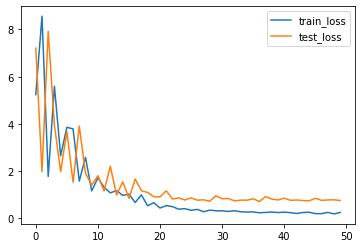

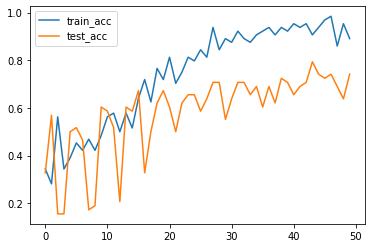

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'], label='test_loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


#plot the accuracy
plt.plot(r.history['accuracy'], label = 'train_acc')
plt.plot(r.history['val_accuracy'], label = 'test_acc')
plt.legend()
plt.show()
plt.savefig('AccVal_Acc')

In [ ]:
# just add the images to the dataset. we are getting a good model by using a transfer learning technique

# saving the model as a h5 file

model.save('/content/drive/My Drive/Datasets/model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.31532848e-01, 2.35073194e-01, 6.33393943e-01],
       [1.61425993e-02, 9.16335106e-01, 6.75222874e-02],
       [7.36338198e-02, 5.37189007e-01, 3.89177203e-01],
       [1.89396828e-01, 2.54670203e-01, 5.55932939e-01],
       [4.16271314e-02, 7.45909631e-01, 2.12463230e-01],
       [1.16157839e-02, 9.22612131e-01, 6.57721013e-02],
       [6.43550244e-04, 4.35205027e-02, 9.55835879e-01],
       [1.22185722e-01, 4.18051928e-01, 4.59762424e-01],
       [7.26204693e-01, 1.29374266e-01, 1.44421041e-01],
       [1.01004411e-02, 9.15015936e-01, 7.48836100e-02],
       [7.74750173e-01, 2.02592816e-02, 2.04990610e-01],
       [3.47970612e-02, 9.60860074e-01, 4.34286380e-03],
       [7.44640082e-03, 9.83817339e-01, 8.73634778e-03],
       [3.90658408e-01, 9.68415104e-03, 5.99657416e-01],
       [6.78178743e-02, 7.99718440e-01, 1.32463738e-01],
       [4.75034788e-02, 8.82974207e-01, 6.95222989e-02],
       [6.05484128e-01, 3.60814631e-01, 3.37012149e-02],
       [5.74511215e-02, 4.87362

In [ ]:
y_pred = np.argmax( y_pred, axis=1)

In [ ]:

y_pred

array([2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('/content/drive/My Drive/Datasets/model_resnet50.h5')



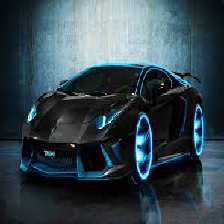

In [ ]:
img = image.load_img('/content/drive/My Drive/Datasets/Test/lamborghini/12.jpg', target_size=(224,224))
img

In [ ]:
x = image.img_to_array(img)
x

array([[[ 5., 13., 16.],
        [ 5., 13., 16.],
        [ 5., 13., 16.],
        ...,
        [19., 27., 30.],
        [19., 27., 30.],
        [20., 28., 31.]],

       [[ 5., 13., 16.],
        [ 5., 13., 16.],
        [ 5., 13., 16.],
        ...,
        [16., 24., 27.],
        [16., 24., 27.],
        [17., 25., 28.]],

       [[ 5., 13., 16.],
        [ 5., 13., 16.],
        [ 5., 13., 16.],
        ...,
        [16., 24., 27.],
        [16., 24., 27.],
        [17., 25., 28.]],

       ...,

       [[12., 16., 19.],
        [13., 17., 20.],
        [14., 18., 21.],
        ...,
        [63., 74., 80.],
        [61., 72., 78.],
        [56., 67., 73.]],

       [[12., 16., 19.],
        [13., 17., 20.],
        [14., 18., 21.],
        ...,
        [63., 74., 80.],
        [61., 72., 78.],
        [56., 67., 73.]],

       [[11., 15., 18.],
        [13., 17., 20.],
        [14., 18., 21.],
        ...,
        [66., 77., 83.],
        [64., 75., 81.],
        [59., 70., 76.]]

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x

array([[[0.01960784, 0.05098039, 0.0627451 ],
        [0.01960784, 0.05098039, 0.0627451 ],
        [0.01960784, 0.05098039, 0.0627451 ],
        ...,
        [0.07450981, 0.10588235, 0.11764706],
        [0.07450981, 0.10588235, 0.11764706],
        [0.07843138, 0.10980392, 0.12156863]],

       [[0.01960784, 0.05098039, 0.0627451 ],
        [0.01960784, 0.05098039, 0.0627451 ],
        [0.01960784, 0.05098039, 0.0627451 ],
        ...,
        [0.0627451 , 0.09411765, 0.10588235],
        [0.0627451 , 0.09411765, 0.10588235],
        [0.06666667, 0.09803922, 0.10980392]],

       [[0.01960784, 0.05098039, 0.0627451 ],
        [0.01960784, 0.05098039, 0.0627451 ],
        [0.01960784, 0.05098039, 0.0627451 ],
        ...,
        [0.0627451 , 0.09411765, 0.10588235],
        [0.0627451 , 0.09411765, 0.10588235],
        [0.06666667, 0.09803922, 0.10980392]],

       ...,

       [[0.04705882, 0.0627451 , 0.07450981],
        [0.05098039, 0.06666667, 0.07843138],
        [0.05490196, 0

In [ ]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.07944325, 0.00392703, 0.9166297 ]], dtype=float32)

In [ ]:
a = np.argmax(model.predict(img_data), axis=1) 
a==1

array([False])